# Homework 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Prints each possible spin vector, and energies for each one
def sigma_vec(N, mu=0, sigma=1):
    
    J = np.random.normal(mu, sigma, [N, N])
    
    vecN = np.array([int(d) for d in str(bin(2**N - 1))[2:]]) # vector for last possible spin vector
    
    for i in range(2**N):
        sig = np.array([float(d) for d in str(bin(i))[2:]])
        if len(sig) < len(vecN):
            sig = np.append(np.zeros(len(vecN) - len(sig)), sig)
        sig = 2.0 * (sig - 0.5)
        
        E = np.dot(np.dot(J, sig), sig)
        
        if i == 0:
            E_prev = E
            E_ref = E
            #print(sig, E)
        
        elif E < E_ref:
            E_prev = E_ref
            E_ref = E
            #print(sig, E)
        
    return E_ref, E_prev #gs, es1

In [3]:
#Prints each possible spin vector, and energies for each one
def sigma_vec_2(N, J):
    
    vecN = np.array([int(d) for d in str(bin(2**N - 1))[2:]]) # vector for last possible spin vector
    
    for i in range(2**N):
        sig = np.array([float(d) for d in str(bin(i))[2:]])
        if len(sig) < len(vecN):
            sig = np.append(np.zeros(len(vecN) - len(sig)), sig)
        sig = 2.0 * (sig - 0.5)
        
        E = np.dot(np.dot(J, sig), sig)
        
        if i == 0:
            E_prev = E
            E_ref = E
            #print(sig, E)
        
        elif E < E_ref:
            E_prev = E_ref
            E_ref = E
            #print(sig, E)
        
    return E_ref, E_prev #gs, es1

In [4]:
mu = 0.0
sigma = 1.0
N = 9

#gs, es = sigma_vec(N)
gs, es = sigma_vec(N)
print(gs, es)

-23.6989838177 -16.5455670339


In [5]:
num_trials = 50
N_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
E_ground = [0.0 for item in N_list]

for N in range(len(N_list)):
    gs = 0
    
    for trial in range(num_trials):
        J_1 = np.random.normal(0.0, 1.0, [N_list[N], N_list[N]])
        gs += sigma_vec_2(N_list[N], J_1)[0] / float(num_trials)
    E_ground[N] = gs

print(N_list)
print(E_ground)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[-2.6846442616846038, -5.0758527686821742, -7.6013893115915874, -12.353124503151134, -14.390000234262878, -20.205380148190713, -23.616420133028647, -24.817175946519455, -32.40902057930392, -36.84205794193926]


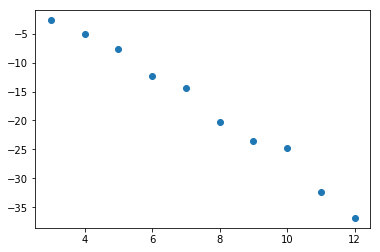

In [6]:
plt.scatter(N_list, E_ground)

In [25]:
num_trials = 50
N_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
E_ground_2 = [0.0 for item in N_list]

for N in range(len(N_list)):
    gs = 0
    
    for trial in range(num_trials):
        J_2 = np.random.normal(0.0, 1.0 / np.sqrt(N_list[N]), [N_list[N], N_list[N]])
        gs += sigma_vec_2(N_list[N], J_2)[0] / float(num_trials)
    E_ground_2[N] = gs

print(N_list)
print(E_ground_2)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[-1.6088187193138885, -2.6478718309744278, -3.7778761548326849, -4.1262411501840734, -5.327943078396002, -6.5685426814002499, -7.8324068452988387, -8.1149147169124678, -9.6327465863182233, -10.39373925230627]


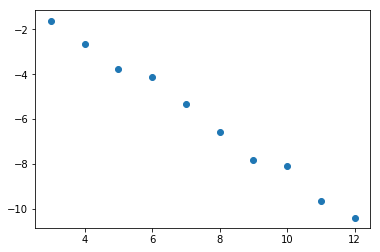

In [26]:
plt.scatter(N_list, E_ground_2)

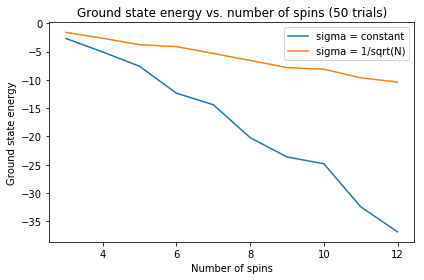

In [27]:
plt.clf()
plt.plot(N_list, E_ground)
plt.plot(N_list, E_ground_2)
plt.legend(['sigma = constant', 'sigma = 1/sqrt(N)'])
plt.title('Ground state energy vs. number of spins (50 trials)')
plt.xlabel('Number of spins')
plt.ylabel('Ground state energy')
plt.tight_layout()
plt.show()

In [22]:
num_trials = 200
N_list = [9 for item in range(50)]

gap_2 = [0.0 for item in N_list]

for N in range(len(N_list)):    
    J_2 = np.random.normal(0.0, 1.0 / np.sqrt(N_list[N]), [N_list[N], N_list[N]])
    gap = sigma_vec_2(N_list[N], J_2)[1] - sigma_vec_2(N_list[N], J_2)[0]
    
    gap_2[N] = gap

#print(N_list)
print(gap_2)

[0.2605292944431552, 0.67761118807508858, 2.3769942648342246, 0.38063775707243508, 1.59670416406823, 0.61473501383008333, 0.92891876281905894, 0.97636797714300272, 0.9414354478311342, 0.072985747856101568, 0.042786441943140296, 0.082161057052408282, 1.8051145154528463, 4.0908131487800006, 0.28669742540735932, 0.78788549434050648, 0.078484584375409838, 0.78122967424984058, 2.5368931853134864, 0.19510304247919841, 0.64805028617620319, 4.5070721535783171, 0.44876871219754388, 2.341806256507093, 0.59714983920914122, 0.065480998443712579, 0.78577225337090262, 0.0055705547641418107, 1.164918847549119, 2.1188847978253902, 0.21003078650015361, 1.2389722204397557, 0.82644939000986462, 0.69886306386021513, 0.19267308816568818, 0.080429098254360731, 0.64857409694551205, 0.21772731196807804, 0.4418965233750427, 0.40835624517069657, 1.4925941997872965, 0.16678154848462068, 3.041746117468044, 0.49860987341686425, 2.4666159798467335, 0.61933005619160042, 1.1871386665627242, 0.31340958541755093, 1.318

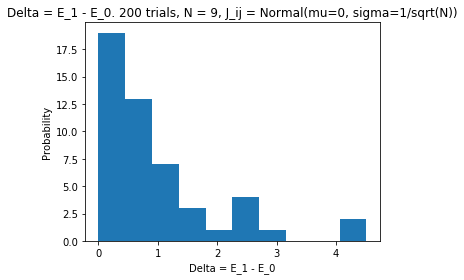

In [23]:
plt.clf()
plt.title('Delta = E_1 - E_0. 200 trials, N = 9, J_ij = Normal(mu=0, sigma=1/sqrt(N))')
plt.xlabel('Delta = E_1 - E_0')
plt.ylabel('Probability')
plt.tight_layout()
plt.hist(gap_2)
plt.show()